In [8]:
import pandas as pd 
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [9]:
#加载数据
data = pd.read_csv('datasets/petrol_consumption.csv')
#数据预览
print(data.head())

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  


In [10]:
# 准备训练数据
# 自变量：汽油税、人均收入、高速公路、人口所占比例
# 因变量：汽油消耗量
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values
#print(y)

#将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=0)

In [15]:
regr = RandomForestRegressor()
pipe = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA()),
                 ('regressor', regr)])
pipe.fit(X_train, y_train)
ypipe = pipe.predict(X_test)

D:\Miniconda\envs\cudaOCRpy37\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [19]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"]+=os.pathsep + 'D:/MurphySoftware/Graphviz/bin'

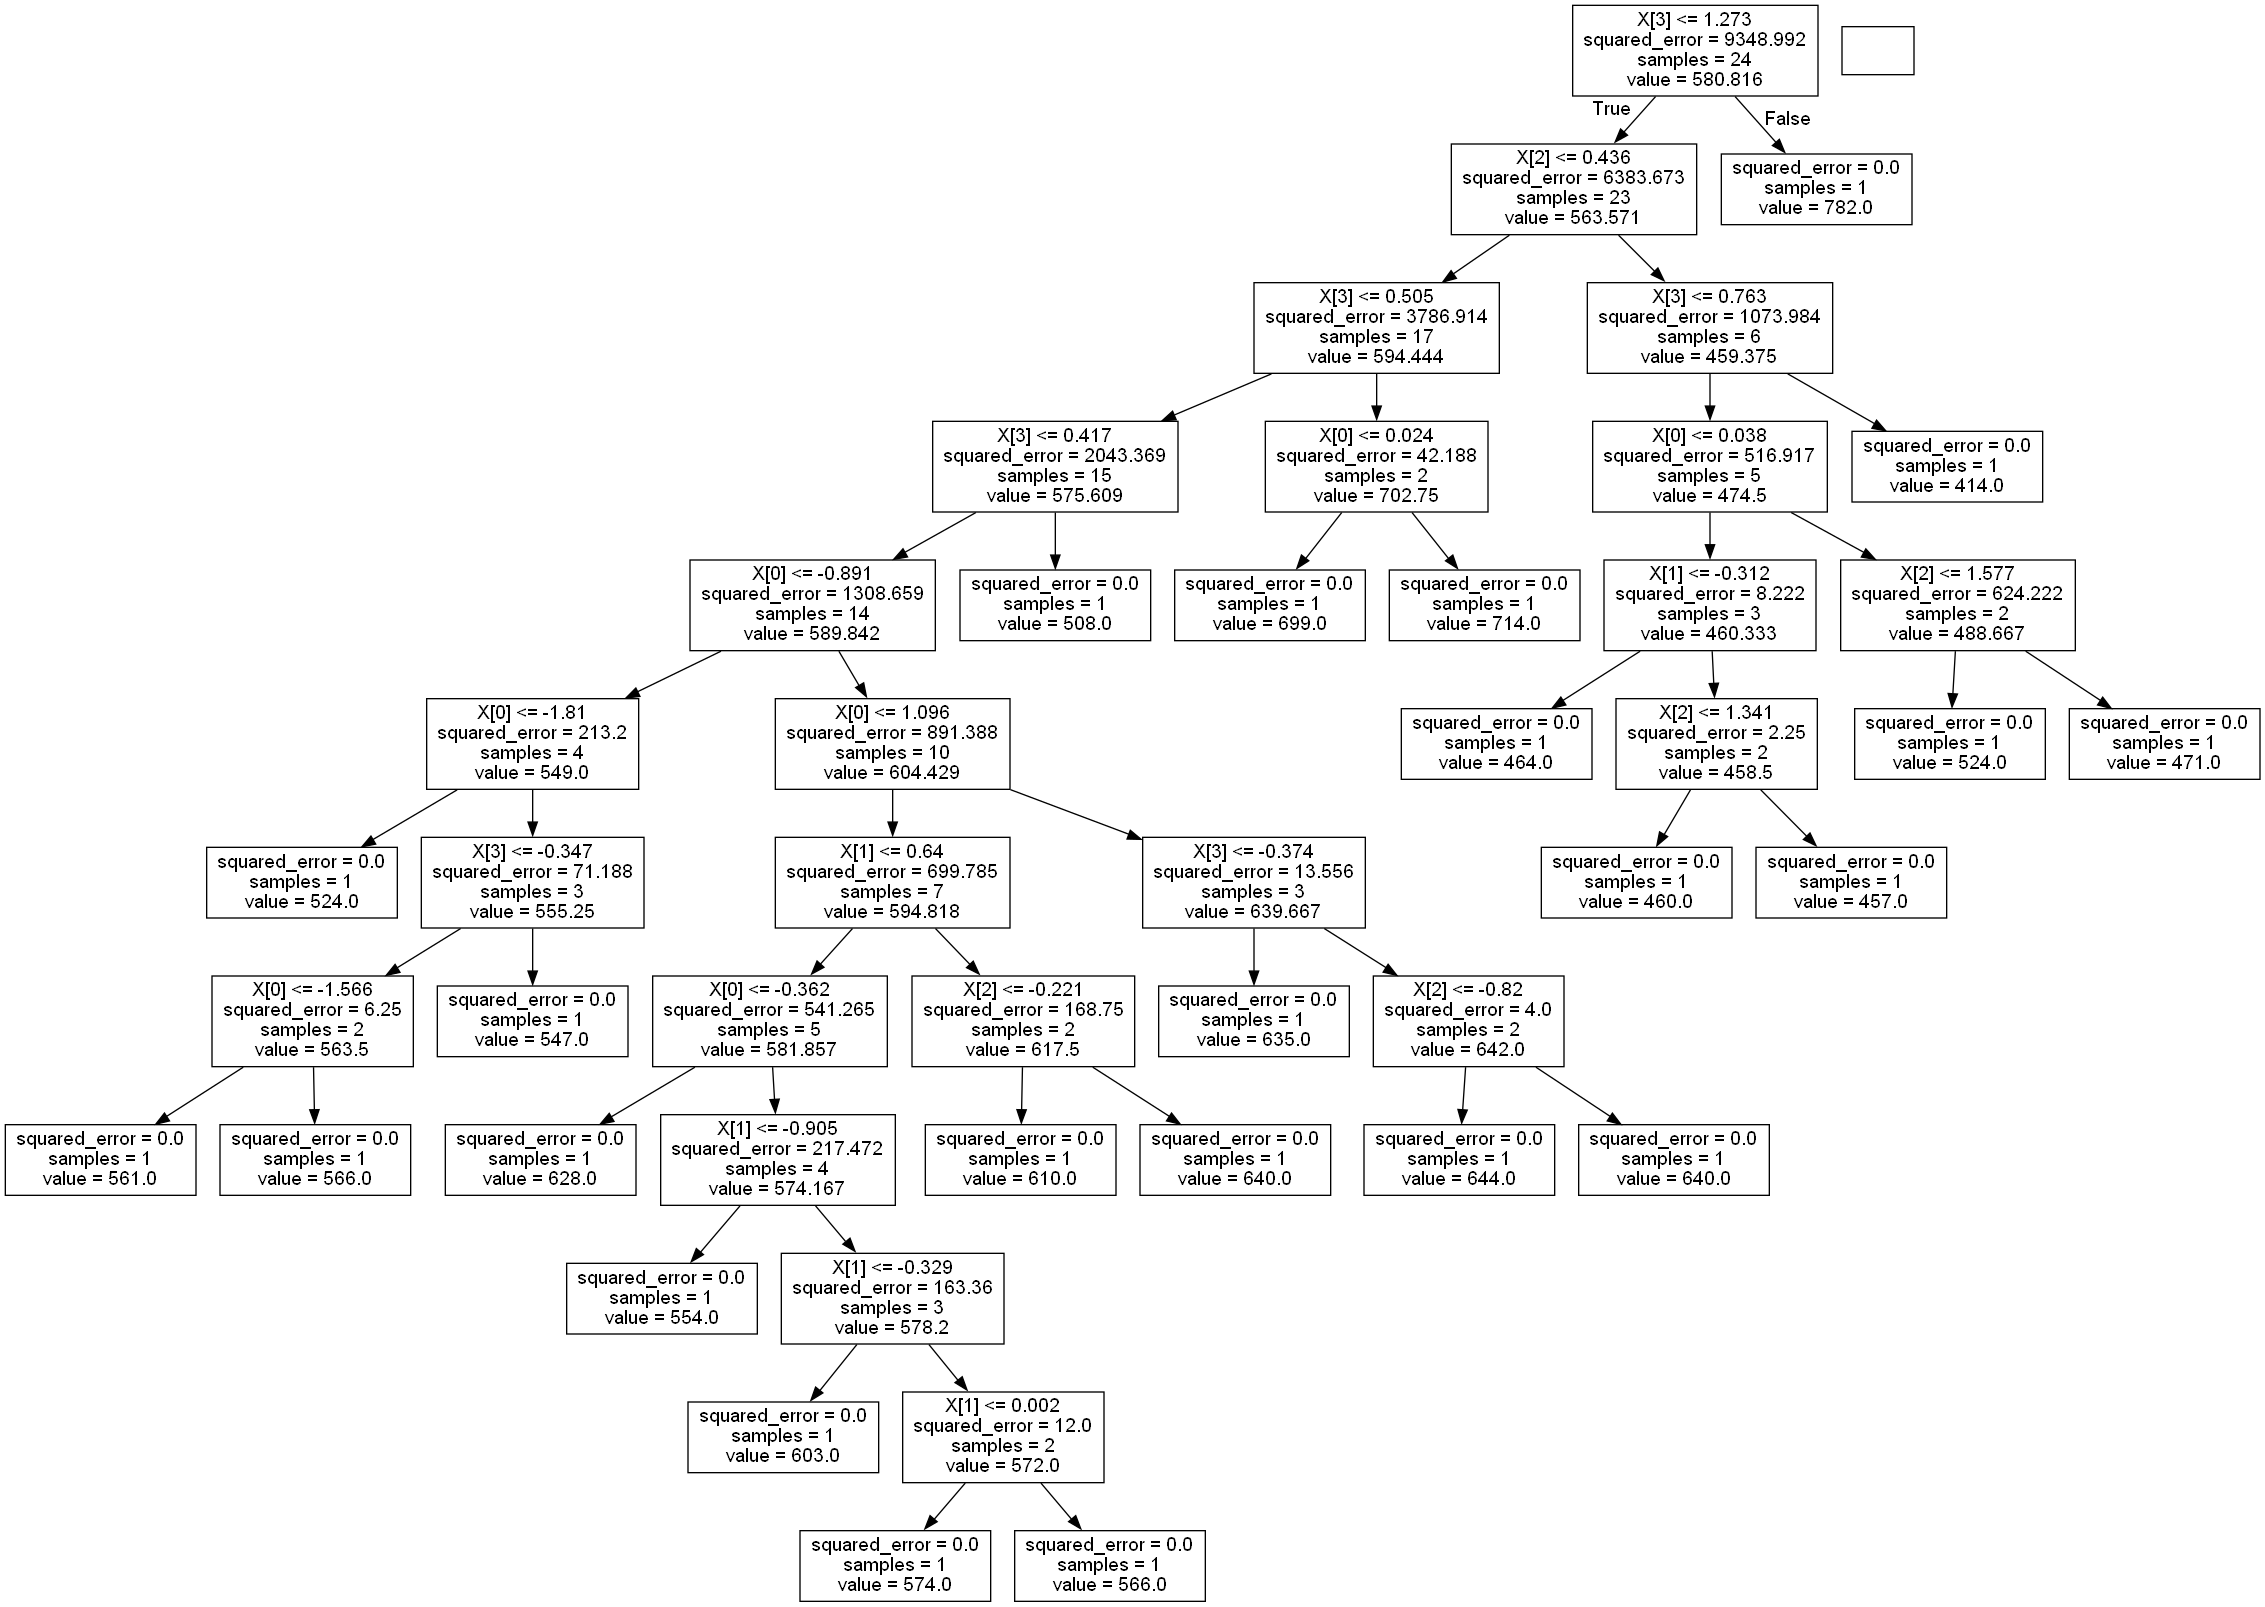

In [20]:
#执行一次
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0],
                out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [22]:
#变量重要性评价: 通过变量重要性评价，可以删除那些不重要的变量，并且性能不会受到影响
#可以将随机森林特征重要性用作一种特征选择方法

#Get numerical feature importances
importances = list(regr.feature_importances_)
#List of tuples with variable and importance
print(importances)

[0.05408200719312966, 0.497403856906082, 0.35955153314647564, 0.0889626027543127]


In [27]:
#Saving feature names for later use
feature_list = list(data.columns)[:-1]

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[0, 1, 2, 3]


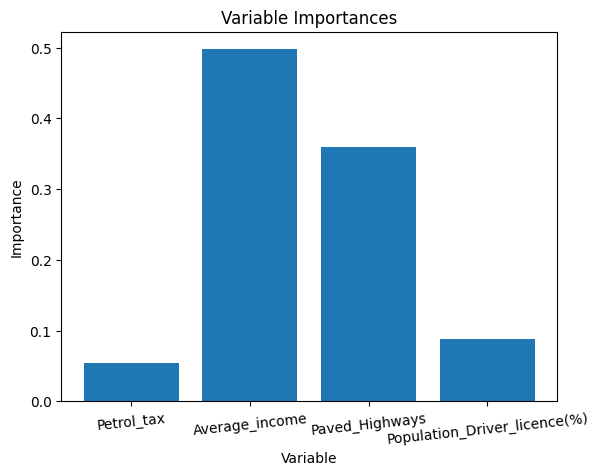

In [28]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks

import matplotlib.pyplot as plt
# Set the style
# plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
print(x_values)
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list,rotation=6)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()